# NAME : Saswata Bose

### TASK 1 : Prediction Using Supervised ML (Level - Beginner) 

#### Predict the percentage of marks of a student based on the number of study hours

## Loading The Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib

# For versioning

# Print Versions for sharing Projects

print(f"Pandas Version : Pandas {pd.__version__}") # Pandas Version Information
print(f"Numpy Version : Numpy {np.__version__}") # Numpy Verison Information
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}") # Matplotlib Version Information
print(f"Seaborn Version : Seaborn {sns.__version__}") # Seaborn Version Information

%matplotlib inline

Pandas Version : Pandas 1.1.3
Numpy Version : Numpy 1.19.2
Matplotlib Version : Matplotlib 3.3.2
Seaborn Version : Seaborn 0.11.0


## Importing / Loading The Dataset

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
# Head of Dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Tail of Dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


##### Data Imported 

## Dataset size

In [5]:
# Shape of the Dataset (Rows and Columns)
df.shape

(25, 2)

#### There are total 25 rows and 2 columns in data.
#### "Hours" is independent variable and "Score" is dependent variable.

## Information and Describing the dataset : - Understanding the dtypes.null values in the dataset

In [6]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Hours Column has Float Data Type and Scores Column has Integer Data Type
#### Both Columns dont have any null values

In [7]:
# Describing Data (Statistical Details of Data)
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### The result shows that the data is rightly skewed as mean > median(50%)

# EDA : Univariate Analysis

C:\Users\Saswata Bose\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


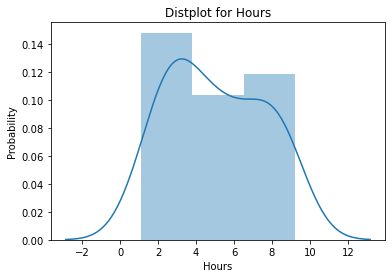

In [8]:
# Distribution Plot for 'Hours'
sns.distplot(df['Hours'])
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.title('Distplot for Hours')
plt.show()

C:\Users\Saswata Bose\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


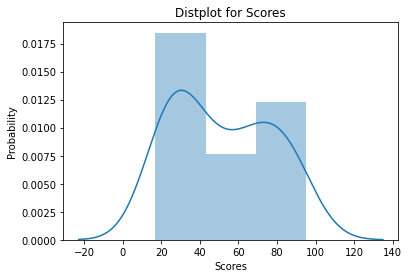

In [9]:
# Distribution Plot for 'Scores'
sns.distplot(df['Scores'])
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Distplot for Scores')
plt.show()

#### Both the plot showing that the distribution of both the variable is right skewed

####  Bivariate Analysis

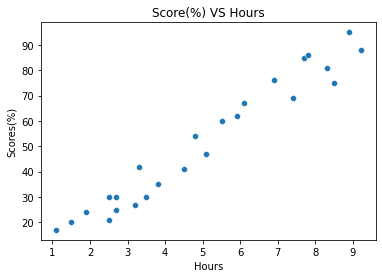

In [10]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.title('Score(%) VS Hours')
plt.show()

#### From the scatter plot ,it is observed that scores are highly positively correlated with number of hours spent in studying. As the number of hours increases so shall the marks increase. 

#### Multivariate Analysis

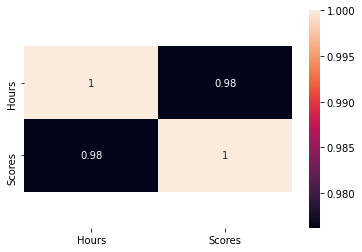

In [11]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

#### From the heatmap, it is observed that the correlation is highly positive and the value of the correlation between the hours of study and scores is 0.98

#### Preparing the data for modelling  

In [12]:
X=df[['Hours']]
y=df[['Scores']]

#### Splitting the data in train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

#### Using Linear Regression for building the model and prediction

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression(fit_intercept=True)

#### Fitting the model

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
# Linear Regression Intercept
lr.intercept_

array([2.01816004])

In [20]:
# Linear Regression Coefficient for Hours
lr.coef_

array([[9.91065648]])

#### The equation will be:
####    1. Scores = intercept + coefficient*(Hours) 
####    2. Scores = 2.01816004 + 9.91065648*(Hours)

#### Plotting the regression line

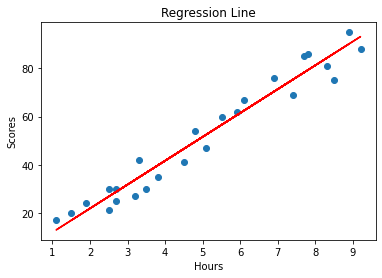

In [21]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

#### Predicting for Xtest

In [22]:
y_pred = lr.predict(X_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [23]:
y_pred = y_pred.flatten()

In [24]:
data = pd.DataFrame({'Actual':y_test.values.flatten(),'Prediction':y_pred})

In [25]:
print(data)

   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


In [26]:
lr.score(X_test,y_test)

0.9454906892105356

#### 94% variation is the Scores is explained by Hours.

#### Testing for new data

In [27]:
hours = np.array(9.25).reshape(1,-1)
results = lr.predict(hours)
print('No of Hours:',np.asscalar(hours))
print('Predicted Score (%) :',np.asscalar(results))

No of Hours: 9.25
Predicted Score (%) : 93.69173248737538


<ipython-input-27-f42140ccf22e>:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('No of Hours:',np.asscalar(hours))
<ipython-input-27-f42140ccf22e>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Predicted Score (%) :',np.asscalar(results))


#### Evaluating the model

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [29]:
RMSE = mean_squared_error(y_test,y_pred,squared=False)
print('RMSE :', RMSE)

RMSE : 4.6474476121003665


In [30]:
MSE = mean_squared_error(y_test,y_pred)
print('MSE :',MSE)

MSE : 21.5987693072174


In [31]:
MAE = mean_absolute_error(y_test,y_pred)
print('MAE :',MAE)

MAE : 4.183859899002975
